In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Flight_Price_dataset.csv to Flight_Price_dataset.csv


In [3]:
# Importing Flight price prediction dataset csv file
import io
df = pd.read_csv(io.BytesIO(uploaded['Flight_Price_dataset.csv']))

In [ ]:
df.head()

,Unnamed: 0,Airline,Flight_No,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price
0,0,IndiGo,6E-2519,"Fri, 6 Jan 2023",23:00,01:20\n+ 1 day,New Delhi,Mumbai,Non Stop,2h 20m,5899
1,1,Go First,G8-336,"Fri, 6 Jan 2023",17:35,19:45,New Delhi,Mumbai,Non Stop,2h 10m,6502
2,2,Go First,G8-323,"Fri, 6 Jan 2023",18:40,20:55,New Delhi,Mumbai,Non Stop,2h 15m,6502
3,3,Vistara,UK-933,"Fri, 6 Jan 2023",15:30,17:35,New Delhi,Mumbai,Non Stop,2h 05m,6795
4,4,Vistara,UK-955,"Fri, 6 Jan 2023",17:45,19:55,New Delhi,Mumbai,Non Stop,2h 10m,6795


*We have scraped data on the basis of classes but forget to add Class column and therefore adding 'Class' column and imputing classes on the basis of their index*

In [4]:
df['Class'] = 0

**Web scraping of Economy class flights from 0 to 642**

In [5]:
df['Class'][0:642] = df.Class[0:642].replace(0,'Economy Class')

**Web scraping of Business class flights from 642 to 1132**

In [6]:
df['Class'][642:1132] = df.Class[642:1132].replace(0,'Business Class')

**Web scraping of Premium Economy class flights from 1132 to 1508**

In [7]:
df['Class'][1132:1508] = df.Class[1132:1508].replace(0,'Premium Economy Class')

**Web scraping of Economy class flights from Mumbai to New Delhi at 1508 to 1878**

In [8]:
df['Class'][1508:1878] = df.Class[1508:1878].replace(0,'Economy Class')

**Web scraping of Premium Economy class flights from Mumbai to New Delhi at 1878 to 2122 index position**

In [9]:
df['Class'][1878:2122] = df.Class[1878:2122].replace(0,'Premium Economy Class')

**Web scraping of Business class flights from Mumbai to New Delhi at 2122 to 2432 index position**

In [10]:
df['Class'][2122:2432] = df.Class[2122:2432].replace(0,'Business Class')

In [11]:
df.tail()

,Unnamed: 0,Airline,Flight_No,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price,Class
2427,2427,Vistara Business,UK-843/848,"Mon, 16 Jan 2023",20:55,17:05\n+ 1 day,Mumbai,New Delhi,1 Stop,20h 10m,55572,Business Class
2428,2428,Vistara Business,UK-877/880,"Mon, 16 Jan 2023",10:45,15:35,Mumbai,New Delhi,1 Stop,4h 50m,55684,Business Class
2429,2429,Vistara Business,UK-877/890,"Mon, 16 Jan 2023",10:45,19:55,Mumbai,New Delhi,1 Stop,9h 10m,55684,Business Class
2430,2430,Vistara Business,UK-873/880,"Mon, 16 Jan 2023",06:20,15:35,Mumbai,New Delhi,1 Stop,9h 15m,55684,Business Class
2431,2431,Vistara Business,UK-841/848,"Mon, 16 Jan 2023",11:25,17:05,Mumbai,New Delhi,1 Stop,5h 40m,56238,Business Class


In [12]:
print('No. of Rows in the dataset :',df.shape[0])
print('No. of Columns in the dataset :',df.shape[1])

No. of Rows in the dataset : 2432
No. of Columns in the dataset : 12


In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
# lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Price'], object: ['Airline', 'Flight_No', 'Date', 'Departure_Time', 'Arrival_Time', 'Source', 'Destination', 'Stops', 'Duration', 'Class']}

In [14]:
# Checking for duplicate data
df.duplicated().sum()

64

In [15]:
df = df.drop_duplicates()

In [16]:
df.reset_index()

,index,Airline,Flight_No,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price,Class
0,0,IndiGo,6E-2519,"Fri, 6 Jan 2023",23:00,01:20\n+ 1 day,New Delhi,Mumbai,Non Stop,2h 20m,5899,Economy Class
1,1,Go First,G8-336,"Fri, 6 Jan 2023",17:35,19:45,New Delhi,Mumbai,Non Stop,2h 10m,6502,Economy Class
2,2,Go First,G8-323,"Fri, 6 Jan 2023",18:40,20:55,New Delhi,Mumbai,Non Stop,2h 15m,6502,Economy Class
3,3,Vistara,UK-933,"Fri, 6 Jan 2023",15:30,17:35,New Delhi,Mumbai,Non Stop,2h 05m,6795,Economy Class
4,4,Vistara,UK-955,"Fri, 6 Jan 2023",17:45,19:55,New Delhi,Mumbai,Non Stop,2h 10m,6795,Economy Class
...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2427,Vistara Business,UK-843/848,"Mon, 16 Jan 2023",20:55,17:05\n+ 1 day,Mumbai,New Delhi,1 Stop,20h 10m,55572,Business Class
2364,2428,Vistara Business,UK-877/880,"Mon, 16 Jan 2023",10:45,15:35,Mumbai,New Delhi,1 Stop,4h 50m,55684,Business Class
2365,2429,Vistara Business,UK-877/890,"Mon, 16 Jan 2023",10:45,19:55,Mumbai,New Delhi,1 Stop,9h 10m,55684,Business Class
2366,2430,Vistara Business,UK-873/880,"Mon, 16 Jan 2023",06:20,15:35,Mumbai,New Delhi,1 Stop,9h 15m,55684,Business Class


In [17]:
df.shape

(2368, 11)

In [ ]:
df.head()

,Airline,Flight_No,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price,Class
0,IndiGo,6E-2519,"Fri, 6 Jan 2023",23:00,01:20\n+ 1 day,New Delhi,Mumbai,Non Stop,2h 20m,5899,Economy Class
1,Go First,G8-336,"Fri, 6 Jan 2023",17:35,19:45,New Delhi,Mumbai,Non Stop,2h 10m,6502,Economy Class
2,Go First,G8-323,"Fri, 6 Jan 2023",18:40,20:55,New Delhi,Mumbai,Non Stop,2h 15m,6502,Economy Class
3,Vistara,UK-933,"Fri, 6 Jan 2023",15:30,17:35,New Delhi,Mumbai,Non Stop,2h 05m,6795,Economy Class
4,Vistara,UK-955,"Fri, 6 Jan 2023",17:45,19:55,New Delhi,Mumbai,Non Stop,2h 10m,6795,Economy Class


* **Price** is our target variable. We will predict flight prices using various regression algorithms

* The given dataset now has 2368 rows and 11 columns

* Date and time has object datatype and hence need to change it to datetime data type

In [18]:
df.isnull().sum()

Airline           0
Flight_No         0
Date              0
Departure_Time    0
Arrival_Time      0
Source            0
Destination       0
Stops             0
Duration          0
Price             0
Class             0
dtype: int64

**No missing values in the dataset.Good to go ahead**

**Conversion of Duration column into minutes**

In [19]:
df['Duration'] = df['Duration'].map(lambda x : x.replace('05m','5m'))

In [20]:
# Conversion of Duration column from hr & Minutes format to Minutes
df['Duration'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# convert this column into a numeric datatypes
df['Duration']= pd.to_numeric(df['Duration'])

In [21]:
df['Date']=pd.to_datetime(df['Date'],format = '%a, %d %b %Y')

In [22]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [23]:
df.drop('Date',axis=1,inplace=True)

In [24]:
df.head()

,Airline,Flight_No,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price,Class,Day,Month,Year
0,IndiGo,6E-2519,23:00,01:20\n+ 1 day,New Delhi,Mumbai,Non Stop,140,5899,Economy Class,6,1,2023
1,Go First,G8-336,17:35,19:45,New Delhi,Mumbai,Non Stop,130,6502,Economy Class,6,1,2023
2,Go First,G8-323,18:40,20:55,New Delhi,Mumbai,Non Stop,135,6502,Economy Class,6,1,2023
3,Vistara,UK-933,15:30,17:35,New Delhi,Mumbai,Non Stop,125,6795,Economy Class,6,1,2023
4,Vistara,UK-955,17:45,19:55,New Delhi,Mumbai,Non Stop,130,6795,Economy Class,6,1,2023


In [25]:
Categorical = ['Airline','Class','Stops','Source','Destination']

In [26]:
pd.set_option('display.max_rows',None)
for i in Categorical :
    print(i)
    print(df[i].value_counts())
    print('='*100)

Airline
Vistara Premium Economy    620
Vistara Business           391
IndiGo                     345
Air India Business         345
Air India                  199
Vistara                    194
Go First                   144
Air Asia                    77
SpiceJet                    53
Name: Airline, dtype: int64
Class
Economy Class            1012
Business Class            736
Premium Economy Class     620
Name: Class, dtype: int64
Stops
1 Stop       1511
Non Stop      855
2 Stop(s)       2
Name: Stops, dtype: int64
Source
New Delhi    1444
Mumbai        924
Name: Source, dtype: int64
Destination
Mumbai       1444
New Delhi     924
Name: Destination, dtype: int64


In [27]:
df[Categorical].describe().T

,count,unique,top,freq
Airline,2368,9,Vistara Premium Economy,620
Class,2368,3,Economy Class,1012
Stops,2368,3,1 Stop,1511
Source,2368,2,New Delhi,1444
Destination,2368,2,Mumbai,1444


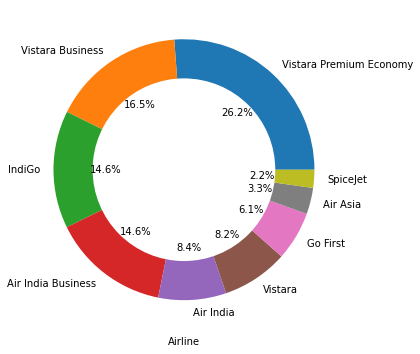

<Figure size 432x288 with 0 Axes>

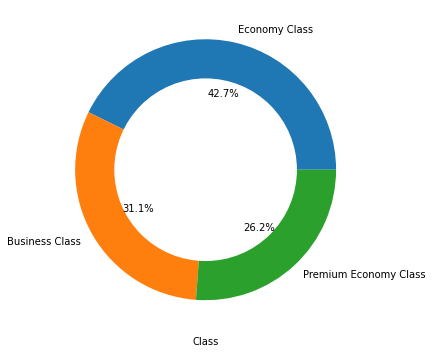

<Figure size 432x288 with 0 Axes>

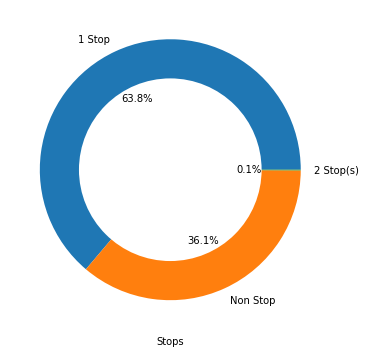

<Figure size 432x288 with 0 Axes>

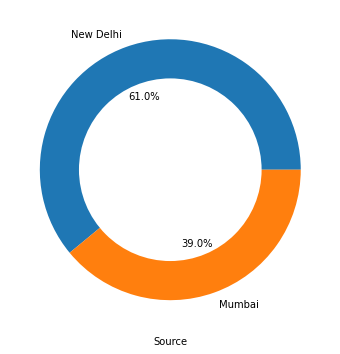

<Figure size 432x288 with 0 Axes>

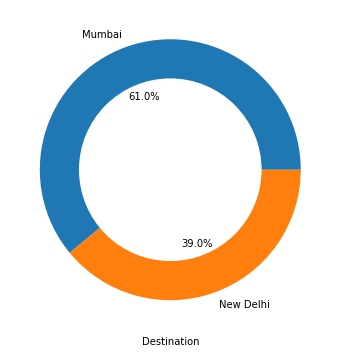

<Figure size 432x288 with 0 Axes>

In [28]:
for i in Categorical:
    plt.figure(figsize=(10,6))
    df[i].value_counts().plot.pie(autopct='%1.1f%%')
    centre=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre)
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure()

* We can see maximum number of flights run by **Vistara Premium Economy** while minimum Flights run by Spicejet

* *Around 26% of flights of Premium Economy Class and 31% of flights are of Business class*

* *42.7% flights are of Ecomony class, as they are low cost of flight & most of people prefer it*

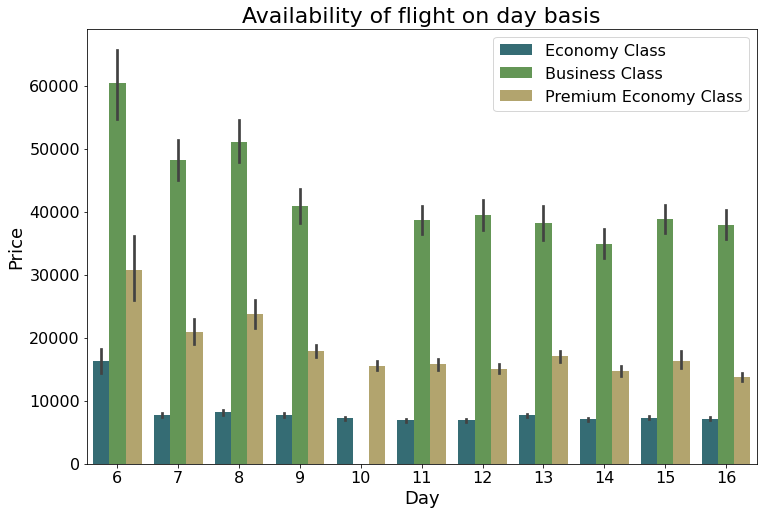

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x = df['Day'], y = df['Price'],hue=df['Class'], palette='gist_earth')
plt.title('Availability of flight on day basis', fontsize=22)
plt.xlabel('Day',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

* The average price of all the classes are on higher side on 6th Jan2023 i.e **Friday**

* So if we book flights a day before, it will be costlier 

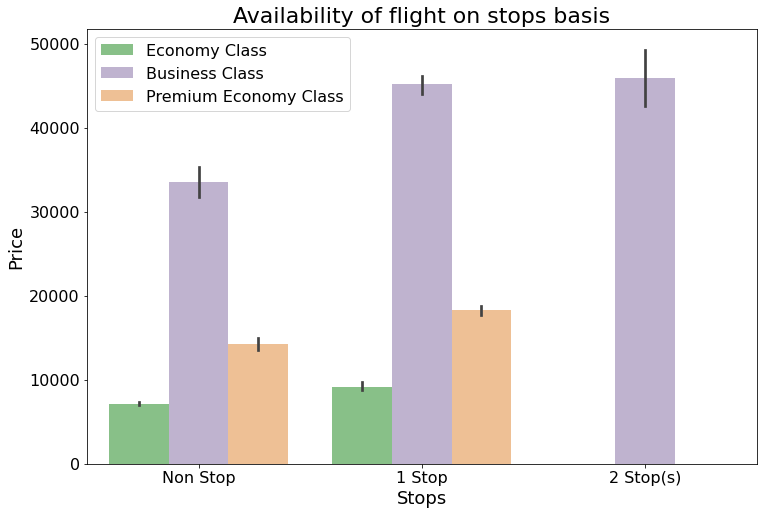

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x = df['Stops'], y = df['Price'],hue=df['Class'], palette='Accent')
plt.title('Availability of flight on stops basis', fontsize=22)
plt.xlabel('Stops',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

* **Non stop flights are cheapest**

* As number of stops increases, the price of flight increases

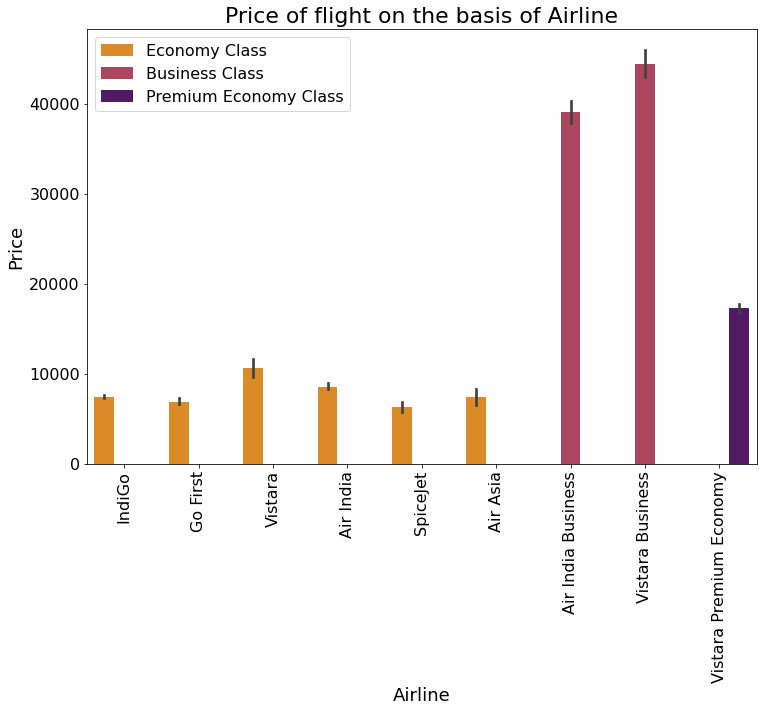

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x = df['Airline'], y = df['Price'],hue=df['Class'], palette='inferno_r')
plt.title('Price of flight on the basis of Airline', fontsize=22)
plt.xlabel('Airline',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

* **Spicejet** flights have lowest fare among all the flights

* *Followed by Go First and Indigo having lower price of flights*


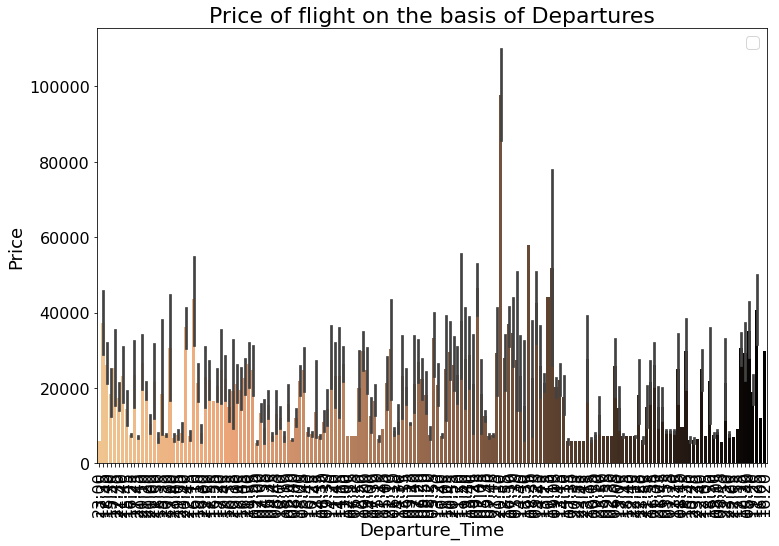

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x = df['Departure_Time'], y = df['Price'], palette='copper_r')
plt.title('Price of flight on the basis of Departures', fontsize=22)
plt.xlabel('Departure_Time',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

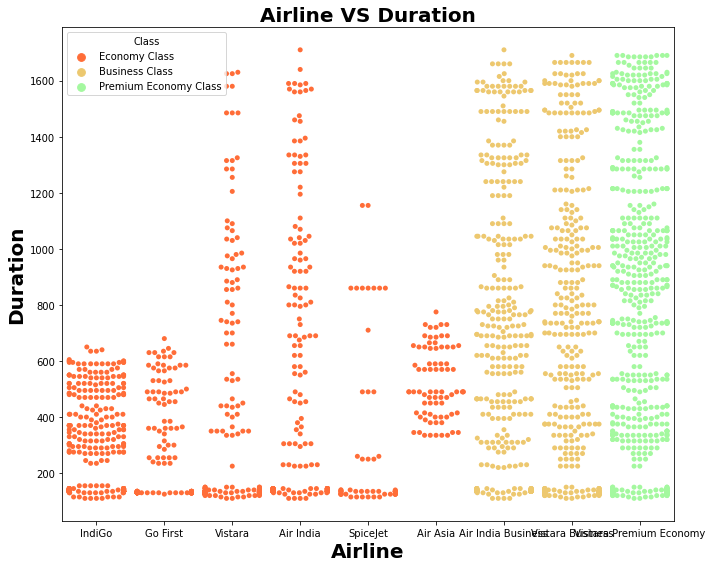

In [34]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
plt.figure(figsize =(10,8))
sns.swarmplot(x=df['Airline'],y=df['Duration'], hue =df['Class'])
plt.title("Airline VS Duration",fontsize=20,fontweight ='bold')
plt.xlabel('Airline',fontsize = 20,fontweight ='bold')
plt.ylabel('Duration',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

In [41]:
num = ['Price', 'Duration','Day']

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,2368.0,570.116132,474.559584,110.0,135.0,410.0,880.0,1710.0
Price,2368.0,21102.645693,17004.632631,4496.0,7320.0,15112.0,30249.0,109881.0
Day,2368.0,11.241132,3.114443,6.0,9.0,11.0,14.0,16.0
Month,2368.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Year,2368.0,2023.000000,0.000000,2023.0,2023.0,2023.0,2023.0,2023.0


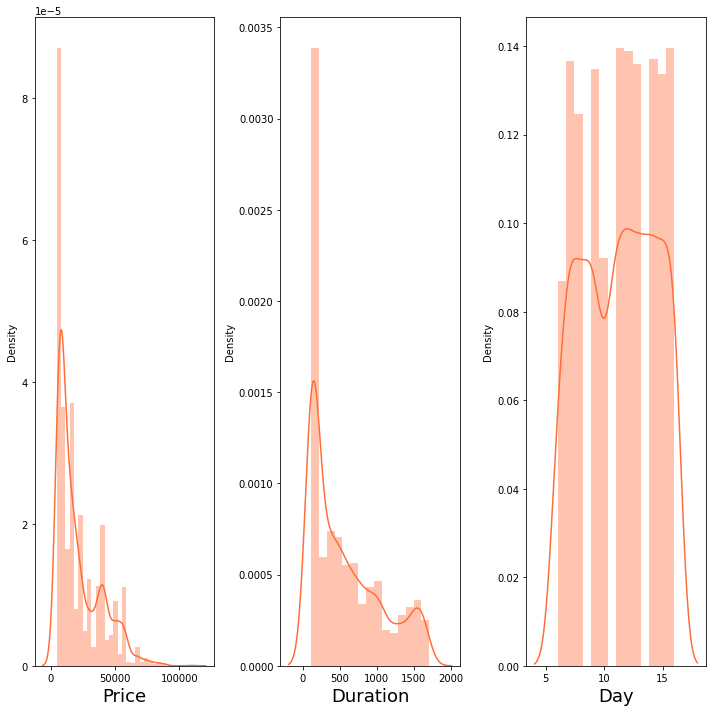

In [44]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num:
    if plotnumber<=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.show()

*Data distribution of* **Price** and **Duration** *are positively skewed*

In [45]:
df.skew()

Duration    0.871297
Price       1.261315
Day        -0.072431
Month       0.000000
Year        0.000000
dtype: float64

# **Feature Engineering**

**Encoding the Categorical variable**

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
df['Flight_No']= df['Flight_No'].map(lambda x: str(x).replace('-',''))
df['Flight_No']= df['Flight_No'].map(lambda x: str(x).replace('/',''))

In [50]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))

In [51]:
df.head()

,Airline,Flight_No,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price,Class,Day,Month,Year
0,4,45,162,15,1,0,2,140,5899,1,6,1,2023
1,3,265,116,184,1,0,2,130,6502,1,6,1,2023
2,3,259,124,199,1,0,2,135,6502,1,6,1,2023
3,6,518,97,165,1,0,2,125,6795,1,6,1,2023
4,6,536,117,187,1,0,2,130,6795,1,6,1,2023


In [52]:
df.corr()

,Airline,Flight_No,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price,Class,Day,Month,Year
Airline,1.000000,0.719180,0.012339,0.037696,-0.002321,0.002321,-0.061116,0.174028,0.136688,0.447884,0.025820,NaN,NaN
Flight_No,0.719180,1.000000,0.074274,0.058017,-0.029501,0.029501,0.066051,0.082907,0.185182,0.246304,0.024626,NaN,NaN
Departure_Time,0.012339,0.074274,1.000000,0.078512,0.075380,-0.075380,0.023494,0.048608,0.046818,-0.010956,-0.123320,NaN,NaN
Arrival_Time,0.037696,0.058017,0.078512,1.000000,-0.009704,0.009704,0.069462,-0.063359,0.026210,0.049923,-0.006914,NaN,NaN
Source,-0.002321,-0.029501,0.075380,-0.009704,1.000000,-1.000000,-0.017102,0.058010,0.071042,0.023773,-0.838871,NaN,NaN
Destination,0.002321,0.029501,-0.075380,0.009704,-1.000000,1.000000,0.017102,-0.058010,-0.071042,-0.023773,0.838871,NaN,NaN
Stops,-0.061116,0.066051,0.023494,0.069462,-0.017102,0.017102,1.000000,-0.691021,-0.289174,-0.011724,0.037164,NaN,NaN
Duration,0.174028,0.082907,0.048608,-0.063359,0.058010,-0.058010,-0.691021,1.000000,0.304681,0.034498,-0.074466,NaN,NaN
Price,0.136688,0.185182,0.046818,0.026210,0.071042,-0.071042,-0.289174,0.304681,1.000000,-0.584117,-0.141487,NaN,NaN
Class,0.447884,0.246304,-0.010956,0.049923,0.023773,-0.023773,-0.011724,0.034498,-0.584117,1.000000,-0.000364,NaN,NaN


In [53]:
#Dropping month and year column
df.drop(columns=['Month','Year'],axis=1,inplace=True)

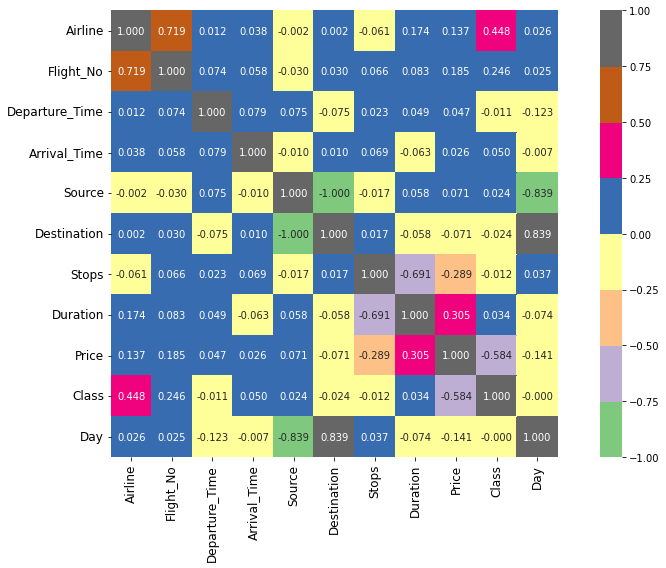

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap='Accent')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

* **Source** and **Destination** seems to be highly correlated and hence dropping both the columns

In [56]:
df.drop(columns=['Source','Destination'],axis=1,inplace=True)

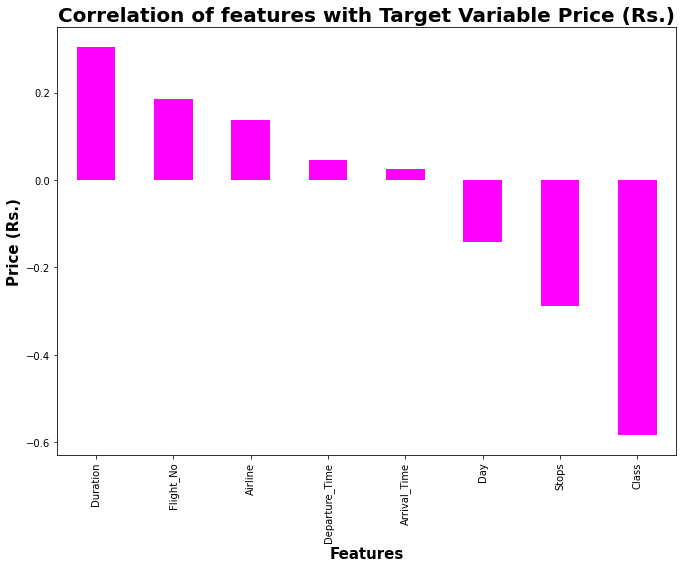

In [57]:
plt.figure(figsize = (10,8))
df.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price (Rs.)',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price (Rs.)',fontsize = 20,fontweight='bold')
plt.show()

* **Class** is highly correlated with target variable Price

* Most of features are **moderately & poorly** correlated with each other

**Skewness Reduction**

In [58]:
# Considering skewness reduction through PowerTransformer

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [59]:
# Seperating features and target variable for Price prediction task

X = df.drop('Price',axis=1)

y = df['Price']

In [60]:
# Applying Power transformer

X_new_pt = pt.fit_transform(X)

# Converting numpy array(X_new_pt) into Dataframe and reassigning the values

X = pd.DataFrame(X_new_pt,columns= X.columns)

# Checking Skewness

X.skew().sort_values(ascending=False)

Stops             0.575448
Duration          0.022975
Day              -0.100937
Class            -0.108392
Arrival_Time     -0.264725
Departure_Time   -0.275582
Airline          -0.289500
Flight_No        -0.357074
dtype: float64

**Skewness of all the features looks good to proceed further**

**Standard Scaling**

In [61]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaler = scaler.fit_transform(X)

In [62]:
# Checking multicollinearity in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaler,i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,2.351129,Airline
1,2.058414,Flight_No
2,1.039591,Departure_Time
3,1.016389,Arrival_Time
4,4.565462,Stops
5,4.616633,Duration
6,1.227239,Class
7,1.025700,Day


**The vif values of all the features are less than 10 and hence no multicollinearity exist in the dataset**

# **Model Building - Price Prediction**

In [63]:
# Importing required libraries

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import pickle
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

**Best Random State**

In [64]:
maxR2score = 0 # Max R2 score
maxRS = 0   # Best random state for which maximum r2 score is achieved

for i in range(1,1000):
    X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=i)
    
    lr = LinearRegression()
    
    lr.fit(X_train,y_train)
    
    pred_lr = lr.predict(X_test)
   
    score_lr = r2_score(y_test,pred_lr)
     
    
    if score_lr>maxR2score:
   
        maxR2score = score_lr
              
        maxRS = i
print("Maximum R2 Score:",maxR2score,"at random state ", maxRS)

Maximum R2 Score: 0.7450033731402048 at random state  577


**Taking random state = 577 as for the base model, we are getting maximum R2 score**

In [66]:
# Train and test split using best random state
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=577)

**Model 1 . LINEAR REGRESSION**

In [67]:
lr = LinearRegression()

lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)

pred_test = lr.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("Training accuracy:",score_train*100)

print("Testing accuracy:",score_test*100)

cv_score = cross_val_score(lr,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean} and accuracy score for training is {score_train} and accuracy for testing is {score_test}")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

Training accuracy: 66.2638642333782
Testing accuracy: 74.50033731402048
At cross fold 5, the cv score is -1.0331149390361531 and accuracy score for training is 0.662638642333782 and accuracy for testing is 0.7450033731402048
Root mean squared Error: 9135.849849368999


**LASSO REGULARIZATION**

In [68]:
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)

lasscv.fit(X_train,y_train)

#Best alpha parameter
alpha = lasscv.alpha_

lasso_reg =Lasso(alpha)

lasso_reg.fit(X_train,y_train)

pred_test = lasso_reg.predict(X_test)

print(lasso_reg.score(X_test,y_test)*100)

74.49983048823813


*The test score for Linear regression and after regularization is almost same*

**Model 2 - KNN REGRESSOR**

In [69]:
knn = KNeighborsRegressor()

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====K Neighbors Regressor=====")

print("R square score for training dataset for K Neighbors regressor: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)     # Testing accuracy

print("R square score for test dataset for K Neighbors Regressor: ", acc_test)

knn_score = cross_val_score(knn,X_scaler,y,cv=5)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor:",knn_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

=====K Neighbors Regressor=====
R square score for training dataset for K Neighbors regressor:  0.9098012833592373
R square score for test dataset for K Neighbors Regressor:  0.898871456658288
Cross val score for K Neighbors Regresor: -87.89534886692118
Root mean squared Error: 5753.321074144402


**TUNING PARAMETERS FOR KNN REGRESSOR**

In [70]:
params_knn = {'n_neighbors':[4,5,6,7,8],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'n_jobs':[-1,1]
             }

grd_knn = GridSearchCV(knn,params_knn)

grd_knn.fit(X_train,y_train)

print(grd_knn.best_params_)

{'algorithm': 'brute', 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}


In [71]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for K Neighbors regressor after tuning: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for K Neighbors Regressor after tuning: ", acc_test)

knn_score = cross_val_score(knn,X_scaler,y,cv=5)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor after tuning:",knn_m*100)

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for K Neighbors Regressor after tuning:",rmse)

R square score for training dataset for K Neighbors regressor after tuning:  0.9997986174285391
R square score for test dataset for K Neighbors Regressor after tuning:  0.9021606449902754
Cross val score for K Neighbors Regresor after tuning: -84.6834349094018
Root mean squared Error for K Neighbors Regressor after tuning: 5658.984780490862


**Model 3 - RANDOM FOREST REGRESSOR**

In [72]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_train = rf.predict(X_train)

pred_test = rf.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====RANDOM FOREST REGRESSOR=====")

print("Training accuracy for Random Forest model:",score_train*100)

print("Testing accuracy for Random Forest model:",score_test*100)

cv_score = cross_val_score(rf,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Random Forest Regressor:",rmse)


=====RANDOM FOREST REGRESSOR=====
Training accuracy for Random Forest model: 98.63136844240846
Testing accuracy for Random Forest model: 92.71777529920374
At cross fold 5, the cv score is 57.455358203543106 
Root mean squared Error for Random Forest Regressor: 4882.179840888337


**TUNING PARAMETERS FOR RANDOM FOREST REGRESSOR**

In [73]:
params_rf = {'min_samples_split':(2,3,4,5),
             'min_samples_leaf' :(2,3,4),             
             'max_depth':(10,15,20)}

grd_rf = GridSearchCV(rf,params_rf)

grd_rf.fit(X_train,y_train)

print(grd_rf.best_params_)

{'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [74]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_test = rf.predict(X_test)

rfs = r2_score(y_test,pred_test)

print("=====After tuning parameters of Random Forest=====")

print("R2 score for Random Forest Model after tuning:",rfs*100)

rf_score = cross_val_score(rf,X_scaler,y,cv=5)

rfc = rf_score.mean()

print("Cross val score for Random Forest model after tuning:",rfc*100)

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Random Forest model after tuning:",rmse)

=====After tuning parameters of Random Forest=====
R2 score for Random Forest Model after tuning: 92.56385480116181
Cross val score for Random Forest model after tuning: 58.55001502059382
Root mean squared Error for Random Forest model after tuning: 4933.506060530634


**Model 4 - ADA BOOST REGRESSOR**

In [75]:
ada = AdaBoostRegressor()

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====ADA BOOST REGRESSOR=====")

print("R square score for training dataset for Ada Boost regressor: ", acc_train)

pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for Ada Boost Regressor: ", acc_test)

ada_score = cross_val_score(ada,X_scaler,y,cv=5)

ada_m = ada_score.mean()

print("Cross val score for Ada Boost Regresor:",ada_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for ada boost Regressor:",rmse)

=====ADA BOOST REGRESSOR=====
R square score for training dataset for Ada Boost regressor:  0.7672991177224321
R square score for test dataset for Ada Boost Regressor:  0.7906525821711512
Cross val score for Ada Boost Regresor: -62.17501650930946
Root mean squared Error for ada boost Regressor: 8277.811635795671


**Tuning Parameters for Ada Boost Regressor**

In [76]:
params_ada = {'n_estimators': [49,51,60],
          'learning_rate':[0.90,0.85,0.30] }

grd_ada = GridSearchCV(ada,params_ada)

grd_ada.fit(X_train,y_train)

print(grd_ada.best_params_)

{'learning_rate': 0.3, 'n_estimators': 51}


In [77]:
ada = grd_ada.best_estimator_

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====ADA BOOST REGRESSOR=====")

print("R square score for training dataset for Ada Boost regressor: ", acc_train)

pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for Ada Boost Regressor: ", acc_test)

ada_score = cross_val_score(ada,X_scaler,y,cv=5)

ada_m = ada_score.mean()

print("Cross val score for Ada Boost Regresor:",ada_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for ada boost Regressor:",rmse)

=====ADA BOOST REGRESSOR=====
R square score for training dataset for Ada Boost regressor:  0.8213056426945393
R square score for test dataset for Ada Boost Regressor:  0.8362370260958597
Cross val score for Ada Boost Regresor: 46.20790174441039
Root mean squared Error for ada boost Regressor: 7321.323442997319


**Model 5 - SUPPORT VECTOR REGRESSOR**

In [78]:
svr = SVR()

svr.fit(X_train,y_train)

pred_train = svr.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for SVR: ", acc_train)

pred_test = svr.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for SVR: ", acc_test)

svr_score = cross_val_score(svr,X_scaler,y,cv=5)

svr_m = svr_score.mean()

print("Cross val score for SVR:",svr_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for SVR:",rmse)

R square score for training dataset for SVR:  -0.1145313586749237
R square score for test dataset for SVR:  -0.150396272743321
Cross val score for SVR: -177.8788502326215
Root mean squared Error for SVR: 19404.634565938213


*The output values doesn't look at all good, better to go for other model*

**Model 6 - Extreme Gradient Boosting Regressor**

In [79]:
xgb = XGBRegressor()

xgb.fit(X_train,y_train)

xgb.score(X_train,y_train)

pred_train = xgb.predict(X_train)

pred_test = xgb.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====XGBoosting REGRESSOR=====")

print("Training accuracy for XGradient Boost model:",score_train*100)

print("Testing accuracy for XGradient Boost model:",score_test*100)

cv_score = cross_val_score(xgb,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for XGradient Boosting model:",rmse)

[10:05:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
=====XGBoosting REGRESSOR=====
Training accuracy for XGradient Boost model: 92.20843757213169
Testing accuracy for XGradient Boost model: 91.18479392429315
[10:05:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:05:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:05:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:05:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:05:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
At cross fold 5, the cv score is 59.471124387871996 
Root mean squared Error for X

**Tuning parameters for XGB**

In [82]:
params_xgb = {'max_depth':[3,4,5,6],
              'learning_rate':(0.01,0.001,0.1),
              'min_child_weight':(0,1,2),
              'max_delta_step':(0,1,2)
              }

grd_xgb = GridSearchCV(xgb,params_xgb)

grd_xgb.fit(X_train,y_train)

print(grd_xgb.best_params_)

[10:08:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:08:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:08:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:08:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [83]:
xgb = grd_xgb.best_estimator_

xgb.fit(X_train,y_train)

xgb.score(X_train,y_train)

pred_train = xgb.predict(X_train)

pred_test = xgb.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====XGradient Boosting REGRESSOR=====")

print("Training accuracy for XGradient Boost model:",score_train*100)

print("Testing accuracy for XGradient Boost model:",score_test*100)

cv_score = cross_val_score(xgb,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for XGradient Boosting model:",rmse)

[10:09:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
=====XGradient Boosting REGRESSOR=====
Training accuracy for XGradient Boost model: 96.46038032319278
Testing accuracy for XGradient Boost model: 92.50573204920447
[10:09:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:09:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:09:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:09:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:09:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
At cross fold 5, the cv score is 56.40740832801063 
Root mean squared Erro

**There is minimum difference between training and testing R2 score for XGB model**

**Hence XGB is the model which best fits our data in predicting the price of flights**

# **Saving the Model**

In [84]:
import pickle
filename = 'Flight_price_prediction_reg.pkl'
pickle.dump(xgb,open(filename,'wb'))

# **Price Prediction using saved Model**

In [85]:
loaded_model = pickle.load(open('Flight_price_prediction_reg.pkl','rb'))
result = loaded_model.predict(X_test)
result

[10:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([ 6338.1724,  7148.074 ,  9475.261 ,  7261.019 , 30649.848 ,
       16412.943 ,  6195.242 , 42345.848 ,  6953.9556, 25132.846 ,
       46752.84  , 50309.58  , 41219.07  ,  7238.8994, 22012.318 ,
       20415.33  , 73788.67  , 48214.33  ,  5718.412 , 40070.59  ,
       47301.453 , 24381.348 , 16999.467 ,  6941.5635,  7710.6113,
        6772.572 , 36998.016 , 16579.262 ,  6886.4307, 59359.68  ,
       29088.332 ,  6263.0737, 42923.14  , 26051.51  , 14179.869 ,
        7954.307 , 71562.305 , 50227.184 ,  7056.6685, 39767.88  ,
       20970.307 , 49406.516 , 40805.836 ,  7383.6147, 49147.37  ,
       15620.065 ,  5590.0273, 45994.523 ,  7871.9434,  6806.7134,
       12389.969 ,  8015.4995,  6981.7124, 13991.522 , 14538.434 ,
       17548.691 , 46805.555 , 41838.297 ,  7411.2534, 49035.98  ,
        6755.537 , 39465.934 ,  7710.6113, 13358.803 , 14655.099 ,
       49103.496 ,  7054.7744,  6556.504 , 15313.898 ,  7361.7803,
        7388.927 , 15989.747 ,  9294.3   , 14616.576 , 41144.7

In [86]:
conclusion_price = pd.DataFrame([loaded_model.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion_price

,0,1,2,3,4,5,6,7,8,9,...,464,465,466,467,468,469,470,471,472,473
Predicted,6338.172363,7148.074219,9475.260742,7261.019043,30649.847656,16412.943359,6195.242188,42345.847656,6953.955566,25132.845703,...,9804.638672,16043.507812,6340.606445,6813.960938,25239.568359,20878.662109,32333.482422,48991.929688,23856.869141,41532.402344
Original,5801.000000,7308.000000,8609.000000,8716.000000,30092.000000,15992.000000,5856.000000,44450.000000,7320.000000,22712.000000,...,8621.000000,17436.000000,5688.000000,7308.000000,22140.000000,16310.000000,29806.000000,56860.000000,31694.000000,39847.000000
